In [12]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [13]:
# initialize COCO api for instance annotations
annFile='/home/mateusz/zpp/maskrcnn-benchmark/tococo/inst.json'
coco=COCO(annFile)

loading annotations into memory...
Done (t=2.88s)
creating index...
index created!


In [14]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds );
# imgIds = coco.getImgIds(imgIds = [1])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

In [4]:
print(img) # detail (możecie to se kliknąć, to niżej do porównania z oryginalnym coco)

{'file_name': '2008_002436.jpg', 'phase': 'val', 'height': 375, 'width': 500, 'date_captured': '31-May-2015 17:44:44', 'id': 2008002436}


In [43]:
print(img) # original coco -- OLD

{'license': 2, 'file_name': '000000279278.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000279278.jpg', 'height': 429, 'width': 640, 'date_captured': '2013-11-15 01:07:24', 'flickr_url': 'http://farm7.staticflickr.com/6101/6275412942_f8dc734c3f_z.jpg', 'id': 279278}


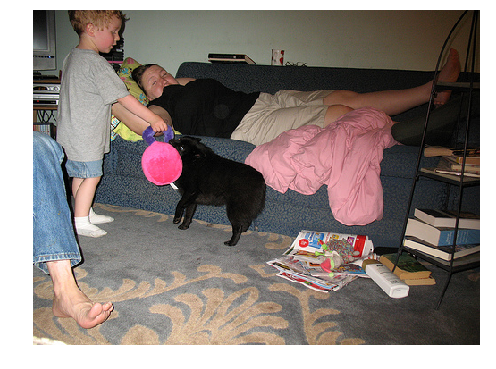

In [18]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
# lol = '/home/mateusz/coco/imgs/val2017/{}'.format(img['file_name'])


# odswież by wylosować inny obrazek

img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
lol = '/home/mateusz/zpp/maskrcnn-benchmark/pascal/VOCdevkit/VOC2010/JPEGImages/{}'.format(img['file_name'])
from PIL import Image
image = Image.open(lol)
I = io.imread(lol)
plt.axis('off')
plt.imshow(I)
plt.show()

[75556, 75557, 75558, 75559]


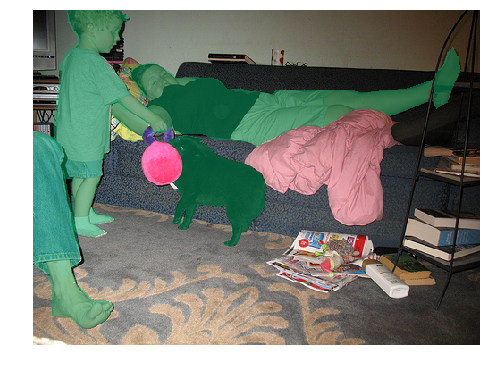

In [19]:
# load and display instance annotations
plt.imshow(I); 
plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
print(annIds)
anns = coco.loadAnns(annIds)
# print(anns)
import json
from pycocotools import mask
# print(mask.decode(json.dumps(anns[0])))
# print(anns[0])
# print(mask.decode(anns[0]))
coco.showAnns(anns)
pass



# TODO
# dziwne kolory annotacji, trzeba zajrzeć w kod COCO

In [20]:
# initialize COCO api for person keypoints annotations
# annFile = '/home/mateusz/coco/annotations/person_keypoints_val2017.json'
annFile = '/home/mateusz/zpp/maskrcnn-benchmark/tococo/kpt.json'
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=0.11s)
creating index...
index created!


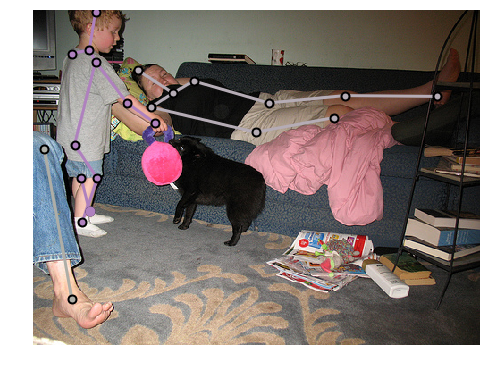

In [21]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)
